In [1]:
import pandas as pd

Dataset = pd.read_excel(r'C:/Users/kqb18171/OneDrive - University of Strathclyde/Crystal shape prediction chapter/Crystal_Shape_Classification.xlsx', sheet_name='3-class_imbalanced_rand')

In [2]:
#Dataset.drop(Dataset.iloc[:, 26:76], inplace = True, axis = 1)

#pd.set_option('display.max_columns', 10)

Dataset.head()

,Solvent name,SMILE,apol,ast_fraglike,ast_fraglike_ext,ast_violation,ast_violation_ext,a_acc,a_acid,a_aro,...,weinerPath,weinerPol,zagreb,BP,MP,Density_g-mL,Sol_25c,SS,Conc_mg-mL,CrysShape
0,2-Propanol,OC(C)C,11.416344,1,1,0,0,1,0,0,...,9,0,12,82.5,-89.0,0.790,5.97,1.408915,8.411221,Polyhedral
1,Ethanol,OCC,8.322758,1,1,0,0,1,0,0,...,4,0,6,78.4,-114.1,0.790,7.87,1.465403,11.532725,Polyhedral
2,Nitromethane,O=[N+]([O-])C,6.464379,1,1,0,0,0,0,0,...,9,0,12,100.0,-29.0,1.140,1.35,1.123957,1.517342,Needle
3,2-Butanone,O=C(CC)C,13.176344,1,1,0,0,1,0,0,...,18,2,16,79.6,-86.0,0.805,18.23,2.011844,36.675909,Needle
4,1-Chlorobutane,ClCCCC,15.221137,1,1,0,0,0,0,0,...,20,2,14,78.5,-123.1,0.880,0.36,1.123780,0.404561,No crystal


In [3]:
print(Dataset.shape)

(261, 215)


In [4]:
# Use numpy to convert to arrays
import numpy as np
# outcomes are the values we want to predict
outcomes = np.array(Dataset['CrysShape'])
# Remove the outcomes from the parameters (data needed for making the prediction)
# axis 1 refers to the columns
features = Dataset.drop(['Solvent name', 'SMILE', 'Conc_mg-mL', 'CrysShape'], axis = 1)
# Saving feature names for later use
features_list = list(features.columns)
# Convert to numpy array
features_list = np.array(features_list)

# train/test split (75/25)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

x = features
y = outcomes

acc_array = list()
clf_array = list()
xy_array = list()

for i in range(100):
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
        
    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    #calculate accuracy of the model
    acc = metrics.accuracy_score(y_test, y_pred)
    
    acc_array.append(acc)
    clf_array.append(clf)
    xy_array.append([x_train, x_test, y_train, y_test])
    
#print('Accuracy: ', acc)   
print('minimal accuracy =', np.min(acc_array))
print('maximal accuracy =', np.max(acc_array))
print('mean accuracy =', np.mean(acc_array))
print('SD =', np.std(acc_array))

minimal accuracy = 0.7424242424242424
maximal accuracy = 0.9393939393939394
mean accuracy = 0.8440909090909089
SD = 0.03587391193321551


# 4-fold Cross-validation

In [6]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [7]:
# Perform 4-fold cross validation
scores = cross_val_score(clf.fit(x_train, y_train), x, y, cv=4)
print ('Cross-validated scores:', scores)
print("average accuracy from 4-fold CV:", np.mean(scores))
print("standard deviation of accuracy:", np.std(scores))

Cross-validated scores: [0.8030303  0.84615385 0.86153846 0.78461538]
average accuracy from 4-fold CV: 0.8238344988344988
standard deviation of accuracy: 0.031187720145654758


# Confusion matrix

In [8]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[16  0  4]
 [ 2 11  2]
 [ 0  2 29]]


In [9]:
#precision and recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Needle       0.89      0.80      0.84        20
  No crystal       0.85      0.73      0.79        15
  Polyhedral       0.83      0.94      0.88        31

    accuracy                           0.85        66
   macro avg       0.85      0.82      0.84        66
weighted avg       0.85      0.85      0.85        66



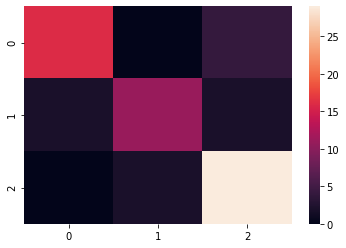

In [10]:
# Visualize it as a heatmap
import matplotlib.pyplot as plt
import seaborn
seaborn.heatmap(conf_mat)
plt.show()

# train/test split (80/20)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

x = features
y = outcomes

acc_array = list()
clf_array = list()
xy_array = list()

for i in range(100):
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
        
    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    #calculate accuracy of the model
    acc = metrics.accuracy_score(y_test, y_pred)
    
    acc_array.append(acc)
    clf_array.append(clf)
    xy_array.append([x_train, x_test, y_train, y_test])
    
#print('Accuracy: ', acc)   
print('minimal accuracy =', np.min(acc_array))
print('maximal accuracy =', np.max(acc_array))
print('mean accuracy =', np.mean(acc_array))
print('SD =', np.std(acc_array))

minimal accuracy = 0.7358490566037735
maximal accuracy = 0.9433962264150944
mean accuracy = 0.8424528301886792
SD = 0.04483862127666469


# 5-fold Cross-validation

In [12]:
# Perform 5-fold cross validation
scores = cross_val_score(clf.fit(x_train, y_train), x, y, cv=5)
print ('Cross-validated scores:', scores)
print("average accuracy from 5-fold CV:", np.mean(scores))
print("standard deviation of accuracy:", np.std(scores))

Cross-validated scores: [0.8490566  0.86538462 0.86538462 0.84615385 0.80769231]
average accuracy from 5-fold CV: 0.846734397677794
standard deviation of accuracy: 0.021098226051882968


# Confusion matrix

In [13]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[12  0  1]
 [ 1  5  4]
 [ 2  1 27]]


In [14]:
#precision and recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Needle       0.80      0.92      0.86        13
  No crystal       0.83      0.50      0.62        10
  Polyhedral       0.84      0.90      0.87        30

    accuracy                           0.83        53
   macro avg       0.83      0.77      0.78        53
weighted avg       0.83      0.83      0.82        53



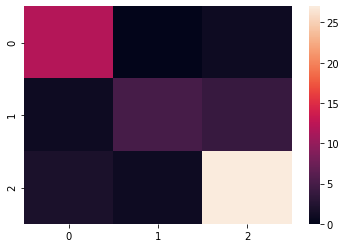

In [15]:
# Visualize it as a heatmap
import matplotlib.pyplot as plt
import seaborn
seaborn.heatmap(conf_mat)
plt.show()

# train/test split (90/10)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

x = features
y = outcomes

acc_array = list()
clf_array = list()
xy_array = list()

for i in range(100):
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10)
        
    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    #calculate accuracy of the model
    acc = metrics.accuracy_score(y_test, y_pred)
    
    acc_array.append(acc)
    clf_array.append(clf)
    xy_array.append([x_train, x_test, y_train, y_test])
    
#print('Accuracy: ', acc)   
print('minimal accuracy =', np.min(acc_array))
print('maximal accuracy =', np.max(acc_array))
print('mean accuracy =', np.mean(acc_array))
print('SD =', np.std(acc_array))

minimal accuracy = 0.7037037037037037
maximal accuracy = 1.0
mean accuracy = 0.8503703703703702
SD = 0.06195710715948587


# 10-fold Cross-validation

In [17]:
# Perform 10-fold cross validation
scores = cross_val_score(clf.fit(x_train, y_train), x, y, cv=10)
print ('Cross-validated scores:', scores)
print("average accuracy from 10-fold CV:", np.mean(scores))
print("standard deviation of accuracy:", np.std(scores))

Cross-validated scores: [0.81481481 0.88461538 0.84615385 0.88461538 0.80769231 0.80769231
 0.88461538 0.84615385 0.80769231 0.73076923]
average accuracy from 10-fold CV: 0.8314814814814815
standard deviation of accuracy: 0.045846157032957816


# Confusion matrix

In [18]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[ 6  0  1]
 [ 0  4  0]
 [ 0  1 15]]


In [19]:
#precision and recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Needle       1.00      0.86      0.92         7
  No crystal       0.80      1.00      0.89         4
  Polyhedral       0.94      0.94      0.94        16

    accuracy                           0.93        27
   macro avg       0.91      0.93      0.92        27
weighted avg       0.93      0.93      0.93        27



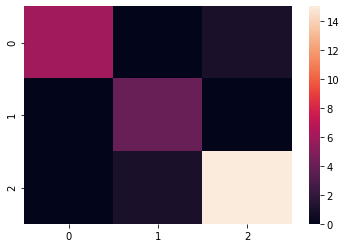

In [20]:
# Visualize it as a heatmap
import matplotlib.pyplot as plt
import seaborn
seaborn.heatmap(conf_mat)
plt.show()